# Assignment 2
### April 14 2021

## Part 1

### 1) 20 pts - Exploratory Data Analysis

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Read in data

In [6]:
data=pd.read_csv('hw2_data.csv')
data.head(10)

Date        IWM        QQQ         SPY
0  2000-05-26  34.800865  67.670738   93.363678
1  2000-05-30        NaN        NaN         NaN
2  2000-05-31        NaN        NaN         NaN
3  2000-06-01  37.036850  76.048004   98.310966
4  2000-06-02  38.963646  81.487755  100.023491
5  2000-06-05        NaN        NaN         NaN
6  2000-06-06  39.201530  79.420624   99.093246
7  2000-06-07        NaN        NaN         NaN
8  2000-06-08  39.153946  81.161362   99.389206
9  2000-06-09  39.843784  81.596519   99.177795

#### 1) Plot the data

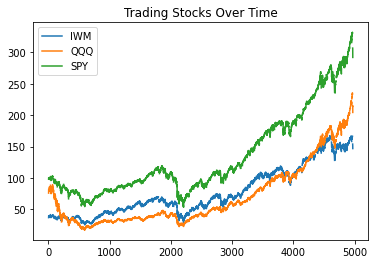

In [7]:
data.plot(title='Trading Stocks Over Time')
plt.show()

#### 2) 5 pts From looking at the plot, does there appear to be missing data?

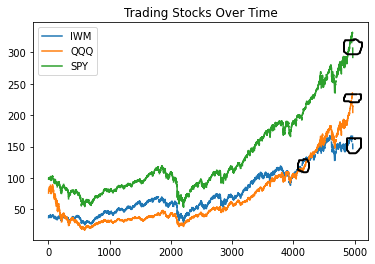

In the image above, I circled a few spots where I can see missing data. other than these, there does not appear to be missing data because I cannot see gaps in the three plotted lines.

#### 3) 5 pts How many NA values appear in each time series? What percentage of data is missing? Give one reason why we might be missing data in this pattern?

In each time series, IWM-QQQ-SPY, there are 897 missing values. Roughly 18.04%  of the data is missing. Since, there are the same number of missing values in each times series, and from a quick glace, I see that on a certain day, if data of one time series is missing, then data in the other two time series of that day is also missing. This leads me to think that on certain days, the stock market might be closed or not recording data, such as on holidays.

In [8]:
copy = data.copy()
symbols=['IWM','QQQ','SPY']
for i in symbols:
    missing_values=data[i].isna().sum()
    full=len(data[i])
    percent=(missing_values/full)*100
    print("The number of missing values in {stock} is {num}".format(stock=i,num=missing_values))
    print("The percent of data missing in {stock} is {num}%".format(stock=i,num=percent))

The number of missing values in IWM is 897
The percent of data missing in IWM is 18.041029766693484%
The number of missing values in QQQ is 897
The percent of data missing in QQQ is 18.041029766693484%
The number of missing values in SPY is 897
The percent of data missing in SPY is 18.041029766693484%


#### 4) 5 pts Describe one business case where you would not proceed with this much missing data. Describe one business case where you would proceed with this much missing data.

One business case where I would not proceed with this much missing data is: Find how two stocks relate to each other by calculating the covaraince between the returns of two stocks, using each of their time series. However, if their times series has this much missing dat (as above) at different places, there becomes a problem of finding a the best way to obtain covariance. I would have to use some sort of fill or imputation method but I cannot guarantee accurate results in this case. 

One business case where I would proceed regardless of this much missing data is: Find factors that have caused the market prices of stock IWM change from 2000 to 2010 to rise. In this business cases, having this much missing values over a ten year time span will not affect the overall trend. Having a couple of missing days will not affect the overall upward trend. If it does, they can be cast as outliers. 

### 2) 20 pts - Missing Data

#### 1) 5 pts Create a forward fill

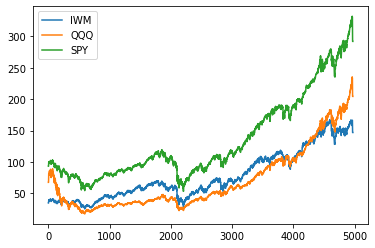

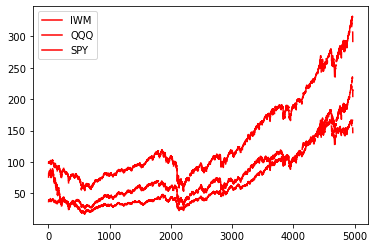

In [9]:

forwardFill =copy.fillna(method='ffill')
forwardFill.plot()
plt.show()
data.plot(color='red')
plt.show()

In [10]:
compare = pd.concat([copy, forwardFill], axis=1)

compare.head(10)

Date        IWM        QQQ         SPY        Date        IWM  \
0  2000-05-26  34.800865  67.670738   93.363678  2000-05-26  34.800865   
1  2000-05-30        NaN        NaN         NaN  2000-05-30  34.800865   
2  2000-05-31        NaN        NaN         NaN  2000-05-31  34.800865   
3  2000-06-01  37.036850  76.048004   98.310966  2000-06-01  37.036850   
4  2000-06-02  38.963646  81.487755  100.023491  2000-06-02  38.963646   
5  2000-06-05        NaN        NaN         NaN  2000-06-05  38.963646   
6  2000-06-06  39.201530  79.420624   99.093246  2000-06-06  39.201530   
7  2000-06-07        NaN        NaN         NaN  2000-06-07  39.201530   
8  2000-06-08  39.153946  81.161362   99.389206  2000-06-08  39.153946   
9  2000-06-09  39.843784  81.596519   99.177795  2000-06-09  39.843784   

         QQQ         SPY  
0  67.670738   93.363678  
1  67.670738   93.363678  
2  67.670738   93.363678  
3  76.048004   98.310966  
4  81.487755  100.023491  
5  81.487755  100.023491  
6  79.420624   99.093246  
7  79.420624   99.093246  
8  81.161362   99.389206  
9  81.596519   99.177795

#### 2) 5 pts Create a backward fill

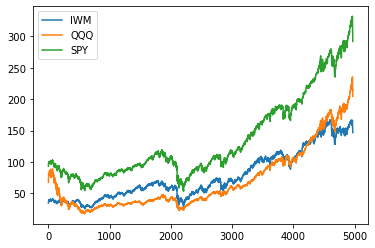

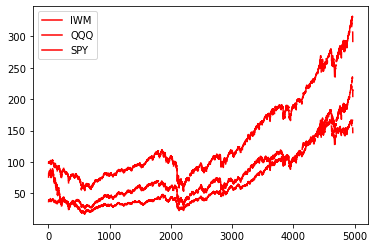

In [11]:
backwardFill = copy.fillna(method='bfill')
backwardFill.plot()
plt.show()
data.plot(color='red')
plt.show()

In [12]:
compare = pd.concat([copy, backwardFill], axis=1)

compare.head(10)

Date        IWM        QQQ         SPY        Date        IWM  \
0  2000-05-26  34.800865  67.670738   93.363678  2000-05-26  34.800865   
1  2000-05-30        NaN        NaN         NaN  2000-05-30  37.036850   
2  2000-05-31        NaN        NaN         NaN  2000-05-31  37.036850   
3  2000-06-01  37.036850  76.048004   98.310966  2000-06-01  37.036850   
4  2000-06-02  38.963646  81.487755  100.023491  2000-06-02  38.963646   
5  2000-06-05        NaN        NaN         NaN  2000-06-05  39.201530   
6  2000-06-06  39.201530  79.420624   99.093246  2000-06-06  39.201530   
7  2000-06-07        NaN        NaN         NaN  2000-06-07  39.153946   
8  2000-06-08  39.153946  81.161362   99.389206  2000-06-08  39.153946   
9  2000-06-09  39.843784  81.596519   99.177795  2000-06-09  39.843784   

         QQQ         SPY  
0  67.670738   93.363678  
1  76.048004   98.310966  
2  76.048004   98.310966  
3  76.048004   98.310966  
4  81.487755  100.023491  
5  79.420624   99.093246  
6  79.420624   99.093246  
7  81.161362   99.389206  
8  81.161362   99.389206  
9  81.596519   99.177795

#### 3) 5 pts Create a moving average fill

In [13]:
import numpy as np
import pandas as pd

def apply_mean_imputer(x, period,col):
    
    if not isinstance(x, pd.Series):
        x=pd.Series(x[col])
    
    results = []
    for i in range(1, len(x)+1):
        slice_of_x = x.iloc[ max(0, i-period) :i]
        mean_of_x = slice_of_x.mean()
        results.append(mean_of_x)
    
    missing_results = pd.Series(results, index=x.index)
    missing_results = np.where(x.isnull(), missing_results, x )
    missing_results = pd.Series(missing_results, index=x.index)
    return missing_results

In [14]:
imputed_data1 = apply_mean_imputer(copy, 5,'IWM')
imputed_data2 = apply_mean_imputer(copy, 5,'QQQ')
imputed_data3 = apply_mean_imputer(copy, 5,'SPY')
imputed_data = pd.DataFrame({'Date':copy.Date,'IWM': imputed_data1,'QQQ':imputed_data2,'SPY':imputed_data3})
imputed_data

Date         IWM         QQQ         SPY
0     2000-05-26   34.800865   67.670738   93.363678
1     2000-05-30   34.800865   67.670738   93.363678
2     2000-05-31   34.800865   67.670738   93.363678
3     2000-06-01   37.036850   76.048004   98.310966
4     2000-06-02   38.963646   81.487755  100.023491
...          ...         ...         ...         ...
4967  2020-02-26  152.328430  215.254486  305.789459
4968  2020-02-27  146.964890  204.475845  292.055939
4969  2020-02-28  151.135437  211.293696  301.587911
4970  2020-03-02  151.135437  211.293696  301.587911
4971  2020-03-03  149.646660  209.865166  298.922699

[4972 rows x 4 columns]

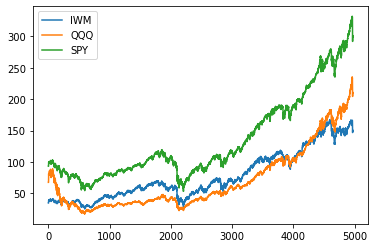

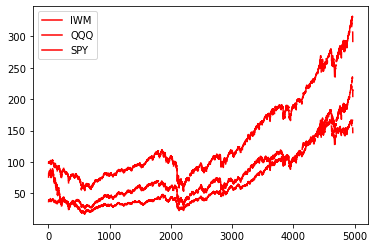

In [15]:
imputed_data.plot()
plt.show()
copy.plot(color='red')
plt.show()

In [16]:
compare = pd.concat([copy, imputed_data], axis=1)
# compare=compare.rename(columns={0:'MeanFill'})
# compare['MeanFill']=compare['MeanFill'].round()
compare.head(10)

Date        IWM        QQQ         SPY        Date        IWM  \
0  2000-05-26  34.800865  67.670738   93.363678  2000-05-26  34.800865   
1  2000-05-30        NaN        NaN         NaN  2000-05-30  34.800865   
2  2000-05-31        NaN        NaN         NaN  2000-05-31  34.800865   
3  2000-06-01  37.036850  76.048004   98.310966  2000-06-01  37.036850   
4  2000-06-02  38.963646  81.487755  100.023491  2000-06-02  38.963646   
5  2000-06-05        NaN        NaN         NaN  2000-06-05  38.000248   
6  2000-06-06  39.201530  79.420624   99.093246  2000-06-06  39.201530   
7  2000-06-07        NaN        NaN         NaN  2000-06-07  38.400675   
8  2000-06-08  39.153946  81.161362   99.389206  2000-06-08  39.153946   
9  2000-06-09  39.843784  81.596519   99.177795  2000-06-09  39.843784   

         QQQ         SPY  
0  67.670738   93.363678  
1  67.670738   93.363678  
2  67.670738   93.363678  
3  76.048004   98.310966  
4  81.487755  100.023491  
5  78.767879   99.167229  
6  79.420624   99.093246  
7  78.985461   99.142568  
8  81.161362   99.389206  
9  81.596519   99.177795

#### 4) 5 pts Create an interpolation

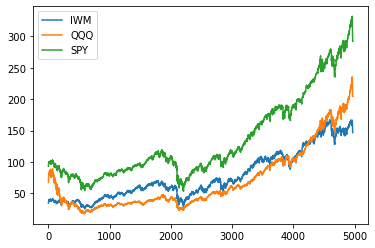

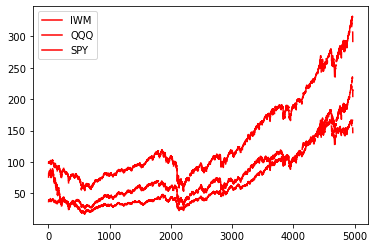

In [17]:
interpolation = copy.interpolate()
interpolation.plot()
plt.show()
copy.plot(color='red')
plt.show()

In [18]:
compare = pd.concat([copy, interpolation], axis=1)
compare.head(10)

Date        IWM        QQQ         SPY        Date        IWM  \
0  2000-05-26  34.800865  67.670738   93.363678  2000-05-26  34.800865   
1  2000-05-30        NaN        NaN         NaN  2000-05-30  35.546193   
2  2000-05-31        NaN        NaN         NaN  2000-05-31  36.291522   
3  2000-06-01  37.036850  76.048004   98.310966  2000-06-01  37.036850   
4  2000-06-02  38.963646  81.487755  100.023491  2000-06-02  38.963646   
5  2000-06-05        NaN        NaN         NaN  2000-06-05  39.082588   
6  2000-06-06  39.201530  79.420624   99.093246  2000-06-06  39.201530   
7  2000-06-07        NaN        NaN         NaN  2000-06-07  39.177738   
8  2000-06-08  39.153946  81.161362   99.389206  2000-06-08  39.153946   
9  2000-06-09  39.843784  81.596519   99.177795  2000-06-09  39.843784   

         QQQ         SPY  
0  67.670738   93.363678  
1  70.463160   95.012774  
2  73.255582   96.661870  
3  76.048004   98.310966  
4  81.487755  100.023491  
5  80.454189   99.558369  
6  79.420624   99.093246  
7  80.290993   99.241226  
8  81.161362   99.389206  
9  81.596519   99.177795

### 3) 60 pts -Smoothing Methods

In [141]:
from sktime.datasets import load_airline
import matplotlib.pyplot as plt
from sktime.forecasting.all import temporal_train_test_split
from sktime.forecasting.all import ExponentialSmoothing
from sktime.performance_metrics.forecasting import smape_loss
from sktime.forecasting.all import ForecastingHorizon

In [149]:
backwardFill_SPY = copy['SPY'].fillna(method='bfill')

In [150]:
bf_SPY=backwardFill.SPY.copy()
bf_SPY.index=copy.Date.tolist()
bf_SPY

2000-05-26     93.363678
2000-05-30     98.310966
2000-05-31     98.310966
2000-06-01     98.310966
2000-06-02    100.023491
                 ...    
2020-02-26    305.789459
2020-02-27    292.055939
2020-02-28           NaN
2020-03-02           NaN
2020-03-03           NaN
Name: SPY, Length: 4972, dtype: float64

In [151]:
bf_SPY.index=index
bf_SPY

2000-05-26     93.363678
2000-05-30     98.310966
2000-05-31     98.310966
2000-06-01     98.310966
2000-06-02    100.023491
                 ...    
2020-02-26    305.789459
2020-02-27    292.055939
2020-02-28           NaN
2020-03-02           NaN
2020-03-03           NaN
Freq: B, Name: SPY, Length: 4972, dtype: float64

In [152]:
y_train, y_test = temporal_train_test_split(bf_SPY)

In [153]:
def smooth_holt(method):
    if method=="SES":
        # Build and fit model, default 
        model = ExponentialSmoothing()
        # Create forecast horizon
#         fh = list(range(1, 1+len(y_test)))
    elif method=="HAT":
        model = ExponentialSmoothing(trend='add')
        # Create forecast horizon
#         fh = list(range(1, 1+len(y_test)))
    elif method=="HMT":
        model = ExponentialSmoothing(trend='mul')
#         fh = list(range(1, 1+len(y_test)))
    elif method=="AAS":
        model = ExponentialSmoothing(trend='add', seasonal='add')
    elif method=="MMS":
        model = ExponentialSmoothing(trend='mul', seasonal='mul')
    model.fit(y_train)
    fh = ForecastingHorizon(y_test.index,is_relative=False)
    #predict using the fitted model across the defined forecast horizon
    y_pred = model.predict(fh=fh )
    # Plot the model and forecast
    y_train.plot()
    y_pred.plot(color='red')
    y_test.plot(color = 'black')
    # evaluate the model performance with just sMAPE
    smape = smape_loss(y_test, y_pred )
    print(f'smape: {smape}')

#### 1) 5 pts Create a Simple Exponential Smoothing

smape: 0.23401100712512923


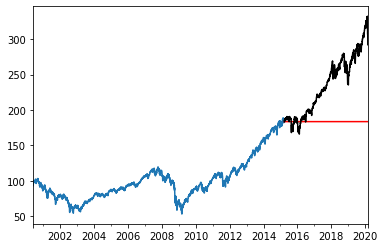

In [154]:
smooth_holt("SES")

#### 2) Holt additive trend

smape: 0.09690184047832265


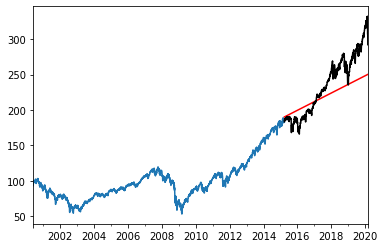

In [156]:
smooth_holt("HAT")

#### 3) 10pts Holt multiplicative trend

smape: 0.08091118823944338


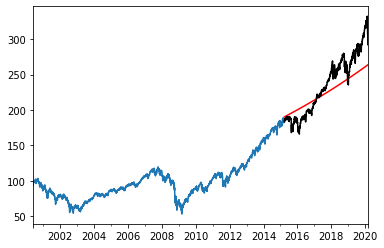

In [158]:
smooth_holt("HMT")

#### 4) 10pts Holt Winters additive trend and additive seasonality

smape: 0.0971129828686093


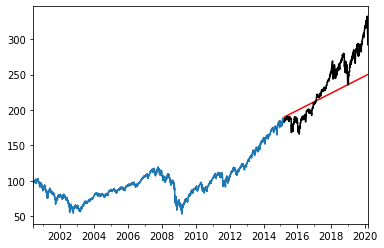

In [160]:
smooth_holt("AAS")

#### 5) 10pts Holt Winters multiplicative trend and multiplicative seasonality

smape: 0.10303138205430151


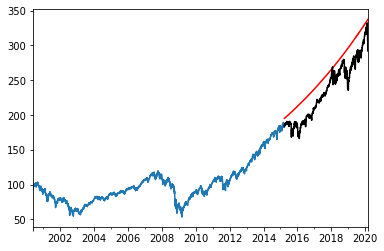

In [163]:
smooth_holt("MMS")

#### 6) 10pts Which is the best model, why is it working better? In general, does it make sense to model stock price data using this method?

Holt Winters additive trend and additive seasonality, with the lowest RSME score, is the best model because it takes into account seasonality. The additive method better produces a trend that fits the data because the seasonal variations are roughly constant through the series, especially from 2009. There seems to be a clear upward trend and the additive metod capture this  better than the multiplicative trend with multiplicative seasonality does- which tends to overfit the actual data.
I don't think it makes sense to model stock prices data uusing this method. I think using a multiplicative seasonality makes more sense. I would predict that the variations tend to shift with the level of the data in stock markett prices, therefore, I would assume that the multiplicative trend seasonality model would make more sense.